In [1]:
%%time
import malaya

CPU times: user 13 s, sys: 1.5 s, total: 14.5 s
Wall time: 18.3 s


## List available deep learning Dependency models

In [2]:
malaya.dependency.available_deep_model()

['concat', 'bahdanau', 'luong']

## Describe supported dependencies

In [3]:
malaya.describe_dependency()

acl - clausal modifier of noun
advcl - adverbial clause modifier
advmod - adverbial modifier
amod - adjectival modifier
appos - appositional modifier
aux - auxiliary
case - case marking
ccomp - clausal complement
compound - compound
compound:plur - plural compound
conj - conjunct
cop - cop
csubj - clausal subject
dep - dependent
det - determiner
fixed - multi-word expression
flat - name
iobj - indirect object
mark - marker
nmod - nominal modifier
nsubj - nominal subject
obj - direct object
parataxis - parataxis
root - root
xcomp - open clausal complement
you can read more from https://universaldependencies.org/en/dep/xcomp.html


In [4]:
string = 'Dr Mahathir menasihati mereka supaya berhenti berehat dan tidur sebentar sekiranya mengantuk ketika memandu.'

## Load CRF model

In [5]:
crf = malaya.dependency.crf()
tagging, indexing = crf.predict(string)
tagging, indexing

([('Dr', 'det'),
  ('Mahathir', 'nsubj'),
  ('menasihati', 'root'),
  ('mereka', 'obj'),
  ('supaya', 'mark'),
  ('berhenti', 'advcl'),
  ('berehat', 'xcomp'),
  ('dan', 'cc'),
  ('tidur', 'conj'),
  ('sebentar', 'case'),
  ('sekiranya', 'nmod'),
  ('mengantuk', 'acl'),
  ('ketika', 'mark'),
  ('memandu', 'advcl')],
 [('Dr', 2),
  ('Mahathir', 3),
  ('menasihati', 0),
  ('mereka', 4),
  ('supaya', 9),
  ('berhenti', 9),
  ('berehat', 9),
  ('dan', 9),
  ('tidur', 7),
  ('sebentar', 7),
  ('sekiranya', 7),
  ('mengantuk', 1),
  ('ketika', 3),
  ('memandu', 3)])

## Visualize graph for dependency output

**Make sure you already installed graphvis.**

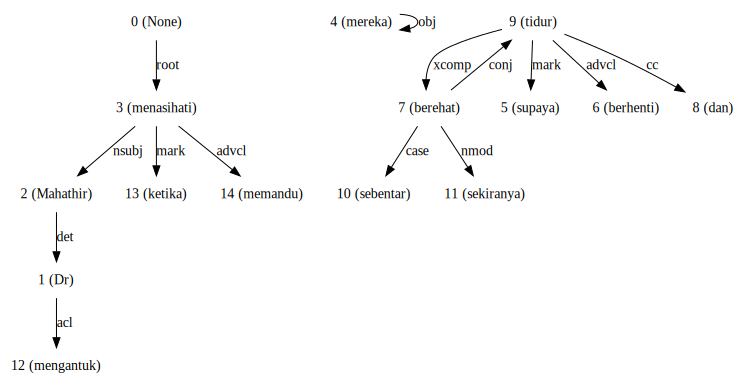

In [6]:
graph = malaya.dependency.dependency_graph(tagging, indexing)
graph.to_graphvis()

## Print important features from CRF model

In [7]:
crf.print_features(10)

Top-10 tagging positive:
8.072296 det      word:berbagai
7.858845 det      word:para
7.857109 det      word:tersebut
7.465632 advmod   word:memang
6.809172 nummod   is_numeric
6.232288 amod     word:menakjubkan
6.188577 advmod   word:terutama
6.067059 case     word:selama
5.723111 advmod   word:lagi
5.675961 case     word:tentang

Top-10 tagging negative:
-2.672044 nsubj    next_word:memang
-2.690972 root     prefix-3:sal
-2.708229 punct    prev_word-prefix-1:9
-2.710053 obl      suffix-3:ena
-2.711398 conj     suffix-3:aat
-2.758406 flat     prefix-2:ya
-2.848409 nsubj    next_word:berisi
-3.400050 compound:plur suffix-2:ya
-3.619957 case     next_word:pernyataan
-5.017675 flat     is_first


## Print important tagging transitions from CRF Model

In [8]:
crf.print_transitions_tag(10)

Top-10 likely tagging transitions:
case   -> obl     5.106777
case   -> nmod    4.338968
cc     -> conj    3.375610
flat   -> flat    3.347966
case   -> xcomp   2.899393
appos  -> flat    2.632795
mark   -> advcl   2.373561
nmod   -> flat    2.247949
conj   -> flat    2.239869
nummod -> obl     2.214665

Top-10 unlikely tagging transitions:
root   -> conj    -2.243008
xcomp  -> parataxis -2.250619
case   -> appos   -2.273873
case   -> obj     -2.506688
case   -> flat    -2.524687
root   -> parataxis -2.581892
mark   -> flat    -2.664428
cop    -> obj     -3.155705
case   -> fixed   -3.301385
root   -> root    -4.324076


## Print important indexing transitions from CRF Model

In [9]:
crf.print_transitions_index(10)

Top-10 likely indexing transitions:
78     -> 78      5.050351
1      -> 1       5.044279
137    -> 137     5.014911
90     -> 90      4.912735
63     -> 63      4.724542
95     -> 95      4.692040
107    -> 108     4.620310
92     -> 93      4.605423
94     -> 98      4.568649
96     -> 99      4.556339

Top-10 unlikely indexing transitions:
0      -> 43      -2.899807
0      -> 44      -2.904968
45     -> 3       -3.004463
33     -> 1       -3.115820
0      -> 33      -3.147339
3      -> 38      -3.170745
0      -> 40      -3.220509
0      -> 37      -3.272783
0      -> 38      -3.425021
0      -> 39      -3.439639


## Load deep learning models

In [10]:
for i in malaya.dependency.available_deep_model():
    print('Testing %s model'%(i))
    model = malaya.dependency.deep_model(i)
    print(model.predict(string))
    print()

Testing concat model
([('Dr', 'nsubj'), ('Mahathir', 'flat'), ('menasihati', 'root'), ('mereka', 'obj'), ('supaya', 'mark'), ('berhenti', 'advcl'), ('berehat', 'obj'), ('dan', 'cc'), ('tidur', 'conj'), ('sebentar', 'advmod'), ('sekiranya', 'obj'), ('mengantuk', 'advcl'), ('ketika', 'mark'), ('memandu', 'advcl')], [('Dr', 3), ('Mahathir', 1), ('menasihati', 0), ('mereka', 3), ('supaya', 4), ('berhenti', 4), ('berehat', 6), ('dan', 9), ('tidur', 7), ('sebentar', 11), ('sekiranya', 9), ('mengantuk', 9), ('ketika', 13), ('memandu', 12)])

Testing bahdanau model
([('Dr', 'nsubj'), ('Mahathir', 'flat'), ('menasihati', 'root'), ('mereka', 'det'), ('supaya', 'mark'), ('berhenti', 'advcl'), ('berehat', 'compound'), ('dan', 'cc'), ('tidur', 'conj'), ('sebentar', 'advmod'), ('sekiranya', 'nsubj'), ('mengantuk', 'advcl'), ('ketika', 'mark'), ('memandu', 'advcl')], [('Dr', 3), ('Mahathir', 1), ('menasihati', 0), ('mereka', 3), ('supaya', 6), ('berhenti', 9), ('berehat', 6), ('dan', 9), ('tidur', 6)

## Print important features from deep learning model

In [11]:
bahdanau = malaya.dependency.deep_model('bahdanau')
bahdanau.print_features(10)

Top-10 positive:
Balaikota: 6.001306
jemaatnya: 5.659410
esai: 5.420834
menyulitkan: 5.298349
Khairun: 5.271856
Scandal: 5.135361
penolakan: 5.070021
gundiknya: 5.057362
gagasan: 4.977351
Banyuputih: 4.972396

Top-10 negative:
Carolina: -5.638381
kontestan: -5.565759
Dibalik: -5.185034
Rotten: -5.032556
1982: -4.824227
ditempatkan: -4.771740
Player: -4.723217
Nuh: -4.664867
rating: -4.659817
tello: -4.614172


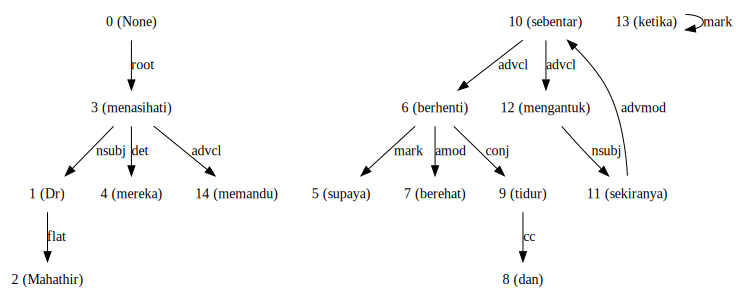

In [12]:
tagging, indexing = bahdanau.predict(string)
malaya.dependency.dependency_graph(tagging, indexing).to_graphvis()

## Print important tagging transitions from deep learning model

In [13]:
bahdanau.print_transitions_tag(10)

Top-10 likely transitions:
cc -> conj: 1.361513
mark -> advcl: 1.160463
compound:plur -> amod: 1.159281
mark -> fixed: 0.990238
obj -> compound: 0.971839
flat -> flat: 0.927018
case -> obl: 0.926517
cop -> det: 0.902245
nsubj -> dep: 0.844691
nsubj:pass -> dep: 0.837701

Top-10 unlikely transitions:
case -> obj: -2.866276
root -> root: -2.830104
case -> parataxis: -2.372282
nsubj:pass -> nsubj:pass: -2.307715
punct -> csubj: -2.298815
compound:plur -> fixed: -2.215350
parataxis -> advcl: -2.196172
nsubj:pass -> compound:plur: -2.159937
mark -> xcomp: -2.143510
csubj -> advmod: -2.140114


## Print important indexing transitions from deep learning model

In [14]:
bahdanau.print_transitions_index(10)

Top-10 likely transitions:
107 -> 108: 1.033257
94 -> 95: 1.014054
126 -> 127: 1.012626
62 -> 63: 1.006339
108 -> 109: 0.991839
34 -> 32: 0.978045
93 -> 94: 0.942446
125 -> 126: 0.913999
52 -> 53: 0.873350
100 -> 103: 0.849339

Top-10 unlikely transitions:
46 -> 45: -3.602909
50 -> 44: -3.443869
46 -> 39: -3.094924
63 -> 62: -3.004683
50 -> 58: -2.873691
44 -> 32: -2.860855
35 -> 13: -2.854243
50 -> 40: -2.849881
45 -> 32: -2.844934
64 -> 63: -2.841505


## Voting stack model

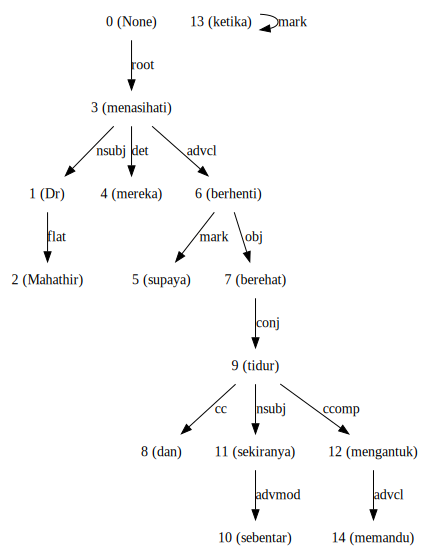

In [18]:
concat = malaya.dependency.deep_model('concat')
bahdanau = malaya.dependency.deep_model('bahdanau')
luong = malaya.dependency.deep_model('luong')
tagging, indexing = malaya.stack.voting_stack([concat, bahdanau, luong], string)
malaya.dependency.dependency_graph(tagging, indexing).to_graphvis()